(500, 1)
[0.00039083]
(500, 1)
[0.00383127]
(3, 500)


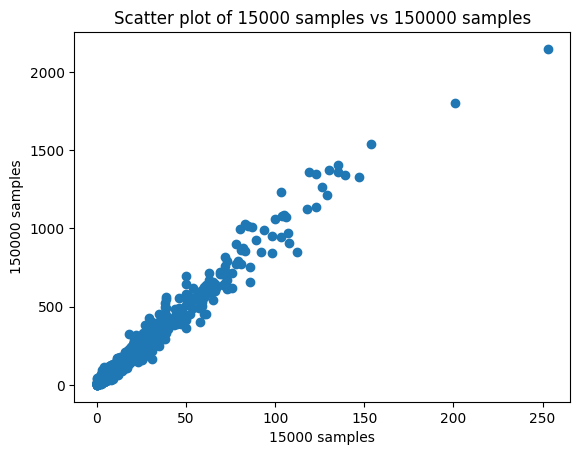

1
0
10


In [41]:
import numpy as np
import matplotlib.pyplot as plt


with open('q.tsv') as f:
    data_q = f.read().splitlines()

with open('p.tsv') as f:
    data_p = f.read().splitlines()

data_p = np.array([list(map(float, line.split('\t'))) for line in data_p])
print(data_p.shape)
print(data_p[1])

data_q = np.array([list(map(float, line.split('\t'))) for line in data_q])
print(data_q.shape)
print(data_q[1])

datap = np.squeeze(data_p)
dataq = np.squeeze(data_q)
#creating three different samples using random sampling and replacement
sample1 = np.random.multinomial(15000, datap)
sample2 = np.random.multinomial(30000, datap)
sample3 = np.random.multinomial(150000, datap)


merged_samples = np.vstack((sample1, sample2, sample3))

print(merged_samples.shape)

#plotting a scatter plot of 15000 samples vs 150000 samples

plt.scatter(sample1, sample3)
plt.xlabel('15000 samples')
plt.ylabel('150000 samples')
plt.title('Scatter plot of 15000 samples vs 150000 samples')
plt.show()


print(sample1[3])
print(sample2[3])
print(sample3[3])





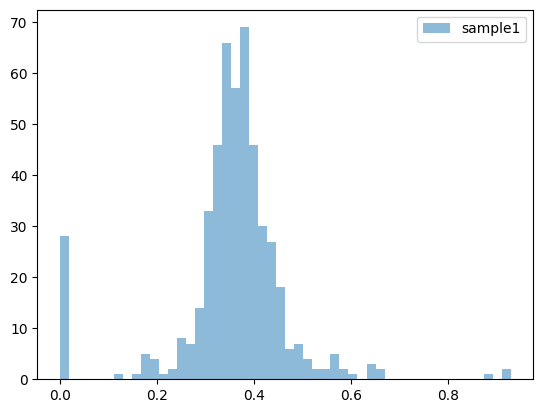

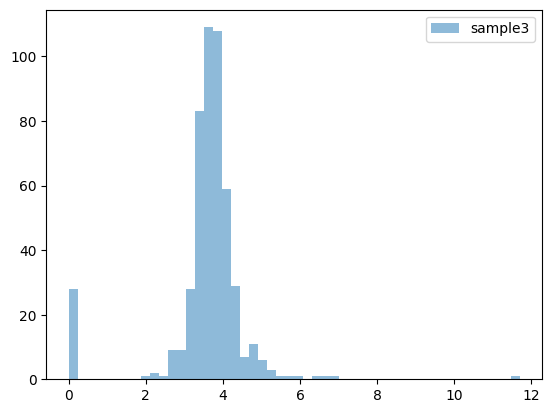

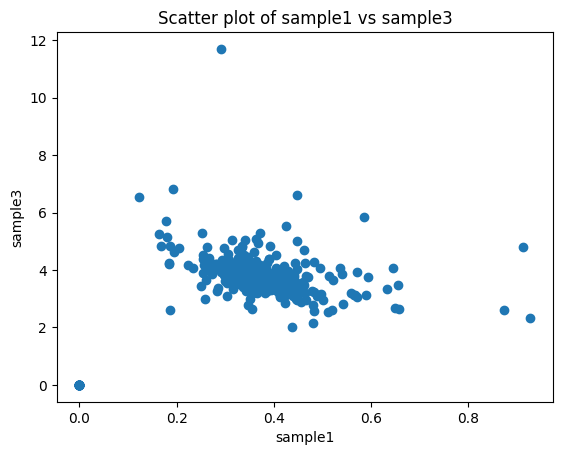

In [61]:


import numpy as np

def DESeq_normalization(samples):
    num_samples, num_genes = samples.shape
    Sjg_hat = np.zeros((num_samples, num_genes))
    denominator = np.ones(num_genes)
    Sj_hat = np.ones(num_genes)
    for i in range(num_genes):
        for j in range(num_samples):
            denominator[i] *= samples[j][i]
    
    for i in range(num_genes):
        for j in range(num_samples):
            if(denominator[i] == 0):
                Sjg_hat[j][i] = 0
            else:
                Sjg_hat[j][i] = samples[j][i] / denominator[i]**(1/num_samples)
                if(j == 2):
                    Sj_hat = np.median(Sjg_hat, axis=1)
    return Sjg_hat, Sj_hat




Sjg_hat, Sj_hat= DESeq_normalization(merged_samples)
#removing NaN and inf values


#histogram for sample 1 and sample 3
plt.figure(1)
plt.hist(Sjg_hat[0], bins=50, alpha=0.5, label='sample1')
plt.legend(loc='upper right')
plt.show()


plt.figure(2)
plt.hist(Sjg_hat[2], bins=50, alpha=0.5, label='sample3')
plt.legend(loc='upper right')
plt.show()


#scatterplot for sample 1 and sample 3
plt.figure(3)
plt.scatter(Sjg_hat[0], Sjg_hat[2])
plt.xlabel('sample1')
plt.ylabel('sample3')
plt.title('Scatter plot of sample1 vs sample3')
plt.show()

#Normalization
Normalized1 = Sjg_hat[0]/Sj_hat[0]
Normalized2 = Sjg_hat[1]/Sj_hat[1]
Normalized3 = Sjg_hat[2]/Sj_hat[2]
Normalized = np.vstack((Normalized1, Normalized2, Normalized3))
print(Sj_hat)

#scatterplot for sample 1 and sample 3

plt.figure(4)
plt.scatter(sample1/Sj_hat[0], sample3/Sj_hat[2])
plt.xlabel('sample1')
plt.ylabel('sample3')
plt.title('Scatter plot of Normalized sample1 vs Normalized sample3')
plt.show()




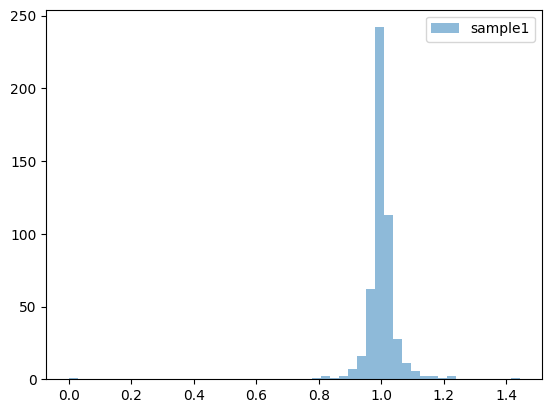

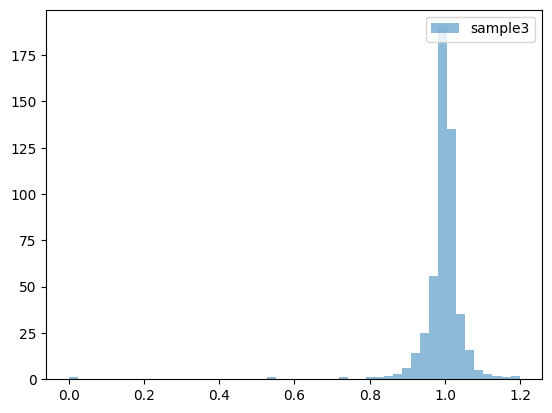

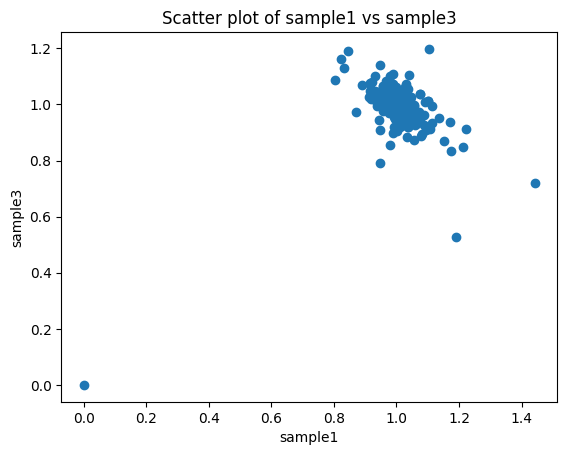

[1.00070683 0.99906848 0.99995832]


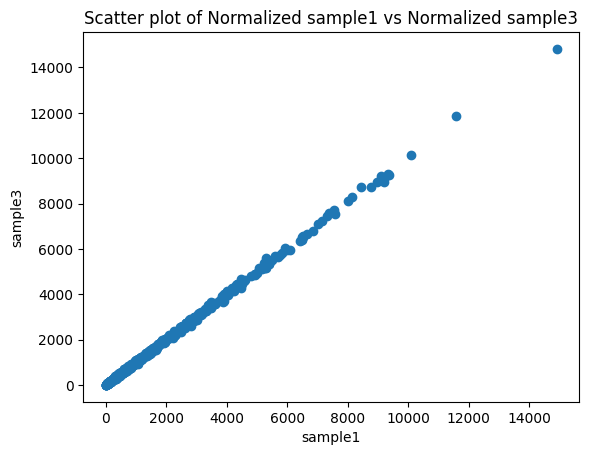

In [69]:
sample1 = np.random.multinomial(1000000, datap)
sample2 = np.random.multinomial(1000000, datap)
sample3 = np.random.multinomial(1000000, datap)


merged_samples = np.vstack((sample1, sample2, sample3))



import numpy as np

def DESeq_normalization(samples):
    num_samples, num_genes = samples.shape
    Sjg_hat = np.zeros((num_samples, num_genes))
    denominator = np.ones(num_genes)
    Sj_hat = np.ones(num_genes)
    for i in range(num_genes):
        for j in range(num_samples):
            denominator[i] *= samples[j][i]
    
    for i in range(num_genes):
        for j in range(num_samples):
            if(denominator[i] == 0):
                Sjg_hat[j][i] = 0
            else:
                Sjg_hat[j][i] = samples[j][i] / denominator[i]**(1/num_samples)
                if(j == 2):
                    Sj_hat = np.median(Sjg_hat, axis=1)
    return Sjg_hat, Sj_hat




Sjg_hat, Sj_hat= DESeq_normalization(merged_samples)
#removing NaN and inf values


#histogram for sample 1 and sample 3
plt.figure(1)
plt.hist(Sjg_hat[0], bins=50, alpha=0.5, label='sample1')
plt.legend(loc='upper right')
plt.show()


plt.figure(2)
plt.hist(Sjg_hat[2], bins=50, alpha=0.5, label='sample3')
plt.legend(loc='upper right')
plt.show()


#scatterplot for sample 1 and sample 3
plt.figure(3)
plt.scatter(Sjg_hat[0], Sjg_hat[2])
plt.xlabel('sample1')
plt.ylabel('sample3')
plt.title('Scatter plot of sample1 vs sample3')
plt.show()

#Normalization
Normalized1 = Sjg_hat[0]/Sj_hat[0]
Normalized2 = Sjg_hat[1]/Sj_hat[1]
Normalized3 = Sjg_hat[2]/Sj_hat[2]
Normalized = np.vstack((Normalized1, Normalized2, Normalized3))
print(Sj_hat)

#scatterplot for sample 1 and sample 3

plt.figure(4)
plt.scatter(sample1/Sj_hat[0], sample3/Sj_hat[2])
plt.xlabel('sample1')
plt.ylabel('sample3')
plt.title('Scatter plot of Normalized sample1 vs Normalized sample3')
plt.show()




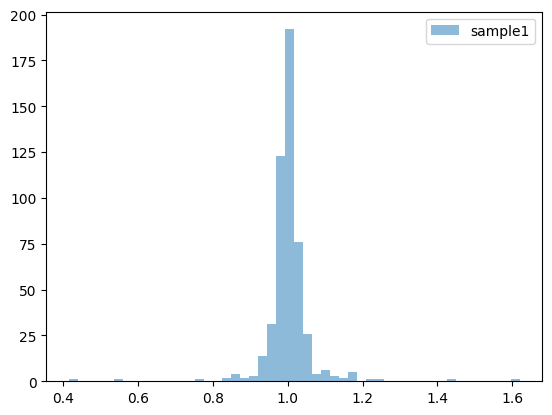

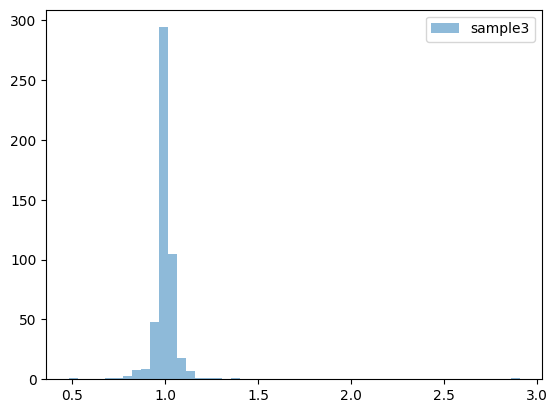

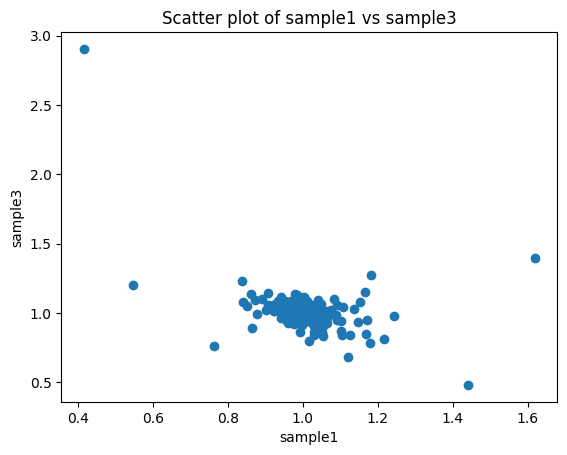

[1.00005316 1.00058063 1.00026201]


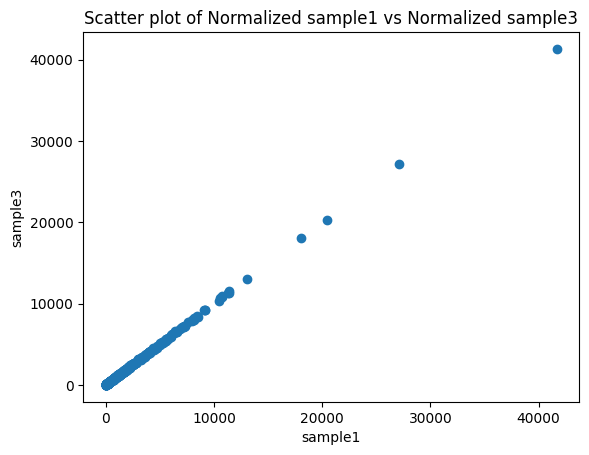

In [70]:
sample1 = np.random.multinomial(1000000, dataq)
sample2 = np.random.multinomial(1000000, dataq)
sample3 = np.random.multinomial(1000000, dataq)


merged_samples = np.vstack((sample1, sample2, sample3))



import numpy as np

def DESeq_normalization(samples):
    num_samples, num_genes = samples.shape
    Sjg_hat = np.zeros((num_samples, num_genes))
    denominator = np.ones(num_genes)
    Sj_hat = np.ones(num_genes)
    for i in range(num_genes):
        for j in range(num_samples):
            denominator[i] *= samples[j][i]
    
    for i in range(num_genes):
        for j in range(num_samples):
            if(denominator[i] == 0):
                Sjg_hat[j][i] = 0
            else:
                Sjg_hat[j][i] = samples[j][i] / denominator[i]**(1/num_samples)
                if(j == 2):
                    Sj_hat = np.median(Sjg_hat, axis=1)
    return Sjg_hat, Sj_hat




Sjg_hat, Sj_hat= DESeq_normalization(merged_samples)
#removing NaN and inf values


#histogram for sample 1 and sample 3
plt.figure(1)
plt.hist(Sjg_hat[0], bins=50, alpha=0.5, label='sample1')
plt.legend(loc='upper right')
plt.show()


plt.figure(2)
plt.hist(Sjg_hat[2], bins=50, alpha=0.5, label='sample3')
plt.legend(loc='upper right')
plt.show()


#scatterplot for sample 1 and sample 3
plt.figure(3)
plt.scatter(Sjg_hat[0], Sjg_hat[2])
plt.xlabel('sample1')
plt.ylabel('sample3')
plt.title('Scatter plot of sample1 vs sample3')
plt.show()

#Normalization
Normalized1 = Sjg_hat[0]/Sj_hat[0]
Normalized2 = Sjg_hat[1]/Sj_hat[1]
Normalized3 = Sjg_hat[2]/Sj_hat[2]
Normalized = np.vstack((Normalized1, Normalized2, Normalized3))
print(Sj_hat)

#scatterplot for sample 1 and sample 3

plt.figure(4)
plt.scatter(sample1/Sj_hat[0], sample3/Sj_hat[2])
plt.xlabel('sample1')
plt.ylabel('sample3')
plt.title('Scatter plot of Normalized sample1 vs Normalized sample3')
plt.show()


